In [1]:
import time
import cv2
import matplotlib.pyplot as plt

import io
from base64 import b64encode
import os
from os import makedirs
from os.path import join, basename
from sys import argv
import json
import requests

## Result of Detection
Here is [Google Cloud Vision API Docs](https://cloud.google.com/vision/docs/)

Cloud Vision API supported extensions.

* JPEG
* PNG8
* PNG24
* GIF
* annimation GIF（just some frames at biginning）
* BMP
* WEBP
* RAW
* ICO

[This Documentation](https://cloud.google.com/vision/docs/quickstart) and [This article](https://www.itbook.info/web/2016/11/google-cloud-vision%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E3%81%BF%E3%81%9F.html) is very helpful.

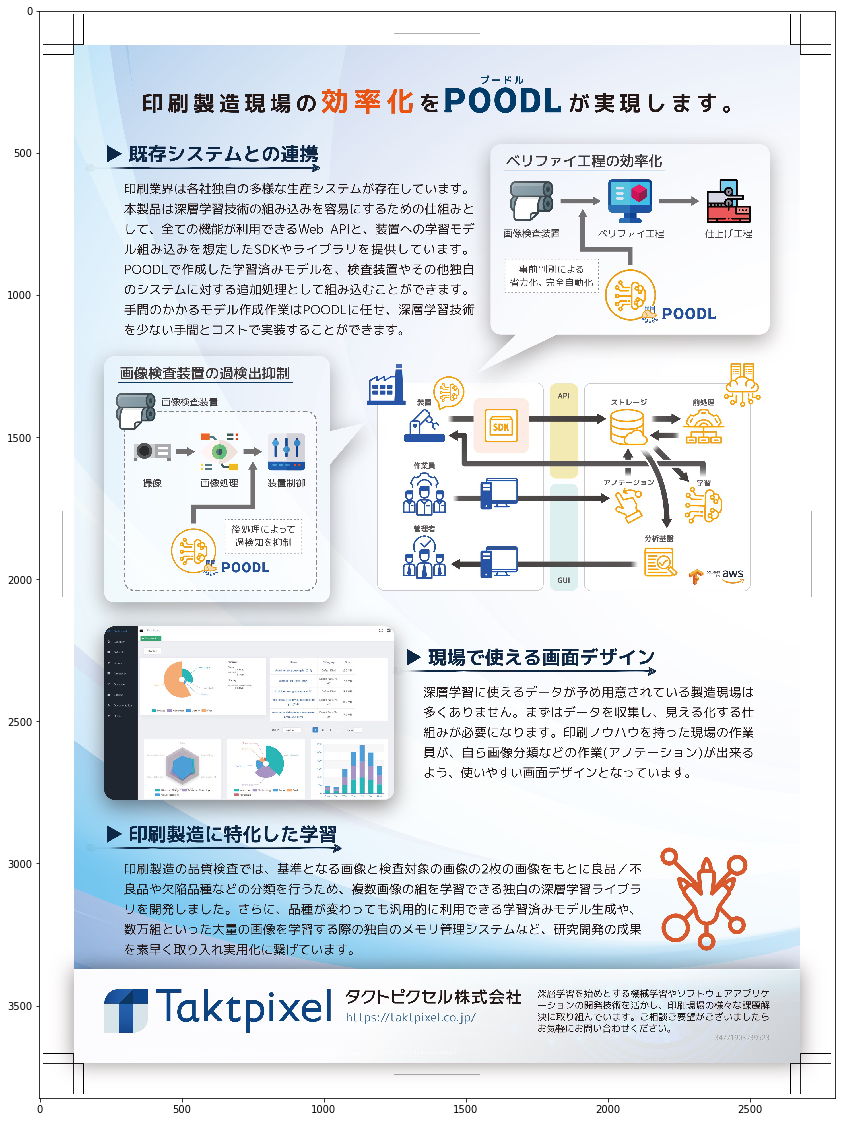

In [2]:
image_path = '../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg'
image = cv2.imread(image_path)
org_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(org_image)

First, We need to create new project at GCP and create API Key.  
Also, you need to accept your ip address.  

After that you should install google-cloud-vision  
```
pip install --upgrade google-cloud-vision
```
and you should echo credential json file path.
```
export GOOGLE_APPLICATION_CREDENTIALS="/home/user/Downloads/[FILE_NAME].json"
```
Check [this page](https://cloud.google.com/vision/docs/libraries?hl=ja).

In [3]:
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = '../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
response = client.text_detection(image=image)
labels = response.text_annotations

for label in labels:
    print(label.description)
    print(label.bounding_poly)    

プードル
印刷製造現場の効率化をPOODLが実現します。
既存システムとの連携
ベリファイ工程の効率化
印刷業界は各社独自の多様な生産システムが存在しています。
本製品は深層学習技術の組み込みを容易にするための仕組みと
して、全ての機能が利用できるWeb APIと、装置への学習モデ
ル組み込みを想定したSDKやライブラリを提供しています。
POODLで作成した学習済みモデルを、検査装置やその他独自
のシステムに対する追加処理として組み込むことができます。
手間のかかるモデル作成作業はPOODLに任せ、深層学習技術
を少ない手間とコストで実装することができます。
画像検査装置
ベリファイ工程
仕上げ工程
:事前判別による:
省力化、完全自動化:
L
画像検査装置の過検出抑制
API
い
画像検査装置
装置
ストレージ
前処理
SDK
作業員
画像処理
装置制御
アノテーション
撮像
学習
&86
:後処理によって
:過検知を抑制
管理者
:
分析基盤
a3品
POODL
GUI
現場で使える画面デザイン
IEI
深層学習に使えるデータが予め用意されている製造現場は
多くありません。まずはデータを収集し、見える化する仕
組みが心要になります。印刷ノウハウを持った現場の作業
員が、自ら画像分類などの作業(アノテーション)が出来る
よう、使いやすい画面デザインとなっています。
印刷製造に特化した学習
印刷製造の品質検査では、基準となる画像と検査対象の画像の2枚の画像をもとに良品/不
良品や欠陥品種などの分類を行うため、複数画像の組を学習できる独自の深層学習ライブラ
リを開発しました。さらに、品種が変わっても汎用的に利用できる学習済みモデル生成や
数万組といった大量の画像を学習する際の独自のメモリ管理システムなど、研究開発の成果
を素早く取り入れ実用化に繋げています。
Taktpixe「
タクトピクセル株式会社
https://taktpixel.co.jp/
深層学習を始めとする機械学習印刷現場の様々な課題解
決に取り組んでいます。ご相談ご要望がございましたら
お気軽にお問い合わせください。
4771903239523

vertices {
  x: 287
  y: 227
}
vertices {
  x: 2569
  y: 227
}
vertices {
  x

In [4]:
start = time.time()

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = '../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg'

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

_image = types.Image(content=content)

# Performs label detection on the image file
response = client.document_text_detection(image=_image)
labels = response.full_text_annotation

print(labels)

boxes = []

for page in labels.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                print(word.bounding_box)
                box_info = []
                for box in word.bounding_box.vertices:
                    box_xy = [box.x, box.y]
                    box_info.append(box_xy)
                boxes.append(box_info)

detect_time = time.time() - start
print('detect_time: ', detect_time)

pages {
  property {
    detected_languages {
      language_code: "ja"
      confidence: 0.469999998808
    }
    detected_languages {
      language_code: "en"
      confidence: 0.259999990463
    }
    detected_languages {
      language_code: "la"
      confidence: 0.109999999404
    }
    detected_languages {
      language_code: "sv"
      confidence: 0.019999999553
    }
    detected_languages {
      language_code: "gd"
      confidence: 0.00999999977648
    }
    detected_languages {
      language_code: "da"
      confidence: 0.00999999977648
    }
    detected_languages {
      language_code: "fi"
      confidence: 0.00999999977648
    }
    detected_languages {
      language_code: "fr"
      confidence: 0.00999999977648
    }
  }
  width: 2798
  height: 3825
  blocks {
    bounding_box {
      vertices {
        x: 1552
        y: 226
      }
      vertices {
        x: 1705
        y: 226
      }
      vertices {
        x: 1705
        y: 264
      }
      vertices {
   

In [5]:
boxes

[[[1552, 226], [1705, 226], [1705, 264], [1552, 264]],
 [[362, 279], [2378, 279], [2378, 363], [362, 363]],
 [[2408, 279], [2432, 279], [2432, 363], [2408, 363]],
 [[244, 468], [262, 468], [262, 532], [244, 532]],
 [[333, 468], [974, 468], [974, 532], [333, 532]],
 [[1649, 496], [2193, 496], [2193, 563], [1649, 563]],
 [[1630, 766], [1819, 766], [1819, 800], [1630, 800]],
 [[1975, 768], [2193, 768], [2193, 803], [1975, 803]],
 [[2345, 766], [2499, 766], [2499, 802], [2345, 802]],
 [[308, 605], [1486, 605], [1486, 651], [308, 651]],
 [[1493, 605], [1506, 605], [1506, 651], [1493, 651]],
 [[303, 675], [1529, 675], [1529, 723], [303, 723]],
 [[298, 742], [387, 742], [387, 796], [298, 796]],
 [[393, 742], [408, 742], [408, 796], [393, 796]],
 [[424, 742], [992, 742], [992, 796], [424, 796]],
 [[1027, 742], [1127, 742], [1127, 796], [1027, 796]],
 [[1141, 742], [1156, 742], [1156, 796], [1141, 796]],
 [[1180, 742], [1521, 742], [1521, 796], [1180, 796]],
 [[312, 817], [1483, 817], [1483, 86

## Plot to Image

In [6]:
h, w, _ = image.shape

for b in boxes:
    image = cv2.rectangle(image, (int(b[0][0]), int(b[0][1])), (int(b[2][0]), int(b[2][1])), (0, 255, 0), 20)

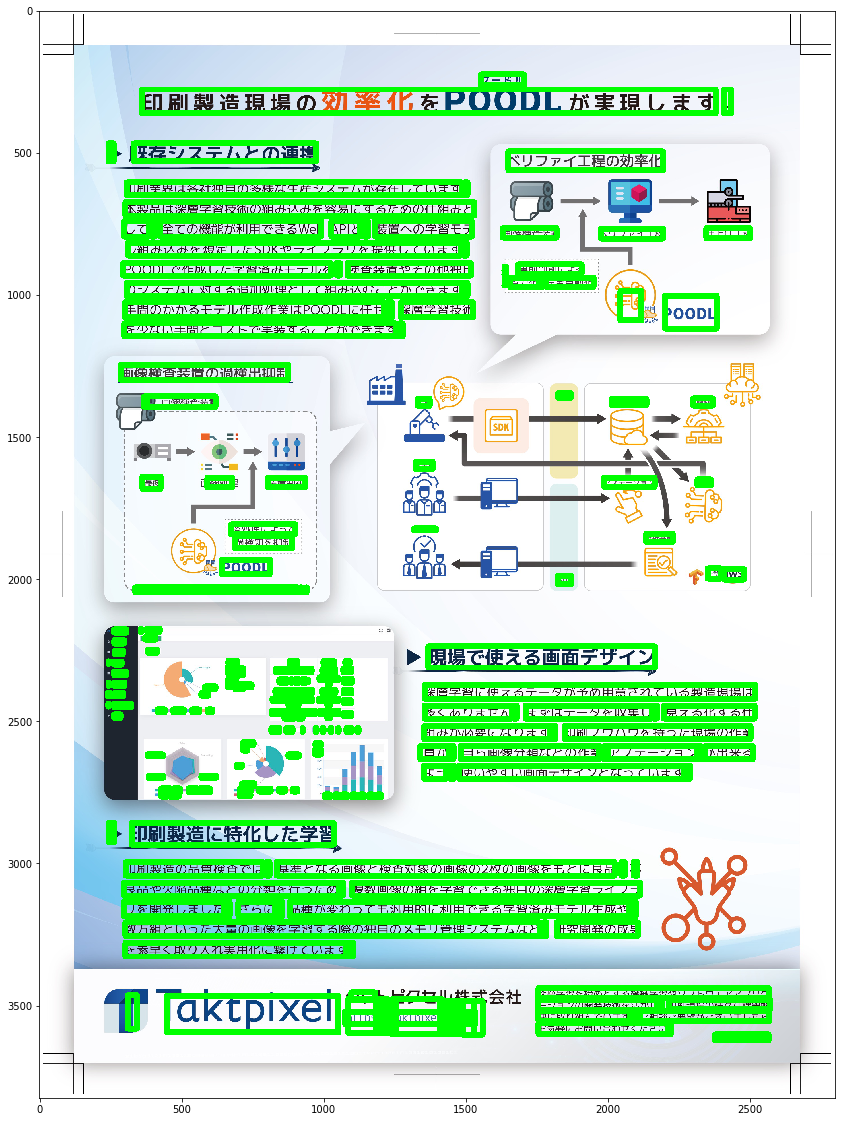

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(image)